384
208
511
473


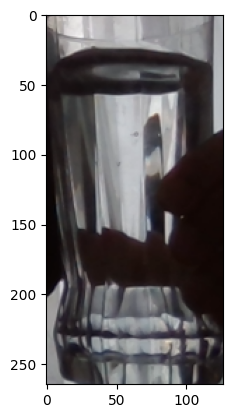

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

"""
    
    freeze webcam and take screenshot of desired part pf your webcam
    
    first you need to freeze screen by pressing your mouse right click button , after that click left button of your mouse to specify 
    your first coordinates x1,y1 and for your second coordinates press left button again 
    Now you have two point pair and they contains x and y coordinates
    Press esc and check your root directory , there is gonna be file that named partial_ss.png
"""



video=cv2.VideoCapture(0)

x_min=1900
y_min=1900
x_max=0
y_max=0

def func(event,x,y,flags,param):
    global go , x_min , y_min, x_max , y_max
    if event==cv2.EVENT_LBUTTONDOWN:
        go=False
    
    if event==cv2.EVENT_RBUTTONDOWN:
        x_min=min(x,x_min)
        y_min=min(y,y_min)
        x_max=max(x,x_max)
        y_max=max(y,y_max)
        
cv2.namedWindow('frame')
cv2.setMouseCallback('frame',func)

go=True

while True:
    ret,frame=video.read()

    if go:
        cv2.imshow("frame",frame)
        m_frame=frame

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

print(x_min)
print(y_min)
print(x_max)
print(y_max)

rgb_frame=cv2.cvtColor(m_frame[y_min:y_max,x_min:x_max],cv2.COLOR_BGR2RGB)

cv2.imwrite("partial_ss.png",rgb_frame)

plt.imshow(rgb_frame)
